# Project 2: TMB movie data 
__By: Arjun Adhikari__


## Introduction

I will be investigating the TMB Movie Data from Kaggle. This is a dataset of >10,000 movies. The dataset contains a lot of information, include the name of the movie, director, studios, genres, vote, popularity, release date, revenue, budget etc. 

__The aim of this analysis is to determine what factors contribute to the success of a movie.__ 

To achieve this, I will first clean the data. Next, I will do the following 
1. Do a cursory investigation of the dataset using the pandas hist() function, and seaborn pairplots() to see if any correlations pop out. 
2. Calculate profit. Even though revenue tells us how much the movie earned, the profit is the correct metric for success, because it tells us how much the movie earned after the budget is taken into account. 
3. Effect of time (decade)
    1. I will investigate how the budget, profit, vote counts, popularity and the number of movies made have changed over time (decade)
4. I will find out if there is any correlation between profit and budget, vote_count,vote_average and popularity 
5. Effect of release month
    1. Number of movies
    2. Profit of the movies 
6. Find the effect of non-quantitative variables. First I will group the movies that have made >500M profit (time adjusted). These are the box office hit movies. For these movies, I will investigate
    1. What are the most popular genres 
    2. Which directors have the highest number of >500M revenue movies 
  
  
__Each set of analysis is done in its own section, and each section will be followed by a section summary__




## Setup and data exploration 

__In the first steps the essential libraries are called and the data is loaded into the jupyter notebook__

- Explore the attributes of the dataset, such as number of columns, datatype, size, etc
- Clean up the dataset 
    - Remove Nan
    - Remove non-necessary columns



### Import libraries

In [116]:
#First step is to import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import scipy
from scipy import stats
from datetime import datetime

### Import dataset

In [188]:
#Import the dataset and assign it to a dataframe 
df_prelim = pd.read_csv('tmdb-movies.csv')


### Dataset exploration

Here we will take a cursory look at the data

- Preview the table using the .head() function
- Size of the data 
- Type of the data set and the number of non-null rows 

In [189]:
#Preview of the table
df_prelim.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [190]:
#Size of the database
df_prelim.shape

(10866, 21)

In [191]:
#Type of data in the database, and number of non-null values
df_prelim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data cleanup
After assessing the data using the info() function, we will clean up the data
- First we will drop the unnecessay columns - these values have no likely relationship with the revenue of the movie 
    - id, imdb_id, homepage, tagline, keywords, overview 
- Use the shape function to check if the columns have been dropped 

__Important Note: I am dropping the budget and revenue columns, because budget_adj and revenue_adj are the relevant quantities. This is because they are inflation adjusted and will allow comparison over time.__  

In [192]:
#drop the unnecessary columns 
df1 = df_prelim.drop(['id', 'imdb_id','homepage','tagline','keywords', 'overview','cast','production_companies','budget','revenue' ], axis = 1)
#we will also only keep the adjusted budget and revenue

df1.shape


(10866, 11)

In [193]:
#check the columns of the new dataframe
df1.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [194]:
#drop NaN from the data frame
df1.dropna(inplace = True)

In [195]:
#check the dimensions of the dataframe to ensure NaNs have been dropped 
df1.shape

(10801, 11)

__We will change the datatype of the release data to datetime. This will be useful later on when analyzing the month by month data__

In [196]:
#change date to datetime 
df1['release_date'] = pd.to_datetime(df1['release_date'])

In [197]:
df1['release_date'].head(1)

0   2015-06-09
Name: release_date, dtype: datetime64[ns]

In [198]:
#Renaming release year to year
df1.rename(index=str, columns={"release_year": "year"}, inplace = True);

__Divide both revenue and budget by 1 million to have the final value in millions. This helps manage the plots better, and doesn't leave floated 1e8, 1e9 values.__

In [199]:
#divide revenue by 1 million
df1['revenue_adj']=df1['revenue_adj'].divide(1000000)
#divide budget by 1 million
df1['budget_adj']=df1['budget_adj'].divide(1000000)

In [200]:
#confirm that the operation was successful 
df1.describe()

,popularity,runtime,vote_count,vote_average,year,budget_adj,revenue_adj
count,10801.000000,10801.000000,10801.000000,10801.00000,10801.000000,10801.000000,10801.000000
mean,0.649450,102.188779,218.590686,5.97079,2001.290343,17.655515,51.672441
std,1.002395,30.782604,577.139279,0.93301,12.819226,34.382645,145.012328
min,0.000188,0.000000,10.000000,1.50000,1960.000000,0.000000,0.000000
25%,0.209163,90.000000,17.000000,5.40000,1995.000000,0.000000,0.000000
50%,0.385492,99.000000,39.000000,6.00000,2006.000000,0.000000,0.000000
75%,0.717479,111.000000,147.000000,6.60000,2011.000000,21.033372,34.084779
max,32.985763,900.000000,9767.000000,9.20000,2015.000000,425.000000,2827.123750


There are still rows where the __budget or the revenue of the movie is zero__. These are not valid numbers for analysis of the movie, especially when the revenue is a critical criterion for the success of the movie 

Therefore we will remove these values 

In [201]:
#Remove the zero values from the budget_adj and revenue_adj columns
columns = ['budget_adj', 'revenue_adj']
df1 = df1.replace(0, pd.np.nan).dropna(axis=0, how='any', subset=columns)

In [202]:
#We will also drop any duplicates at this point 
df1 = df1.drop_duplicates()

In [203]:
df1.shape

(3853, 11)

__Conclusion: We see that we have reduced the number of columns quite a bit. However, a large number of data that was dropped did not have any data on budget or revenue, and those numbers are essential to determine the profit, a metric neccessary to gauge if a movie is successful. Moreover, 3800+ is still a good number of data points to analyze how different variables may dictate the success of the movie__

## Preliminary data investigation 

Now that we have done an intial cleanup on the data, we will take a cursory look at the datay. 

Let's first quickly investigate the dataset using the hist function to see if any attributes pop out immediately 

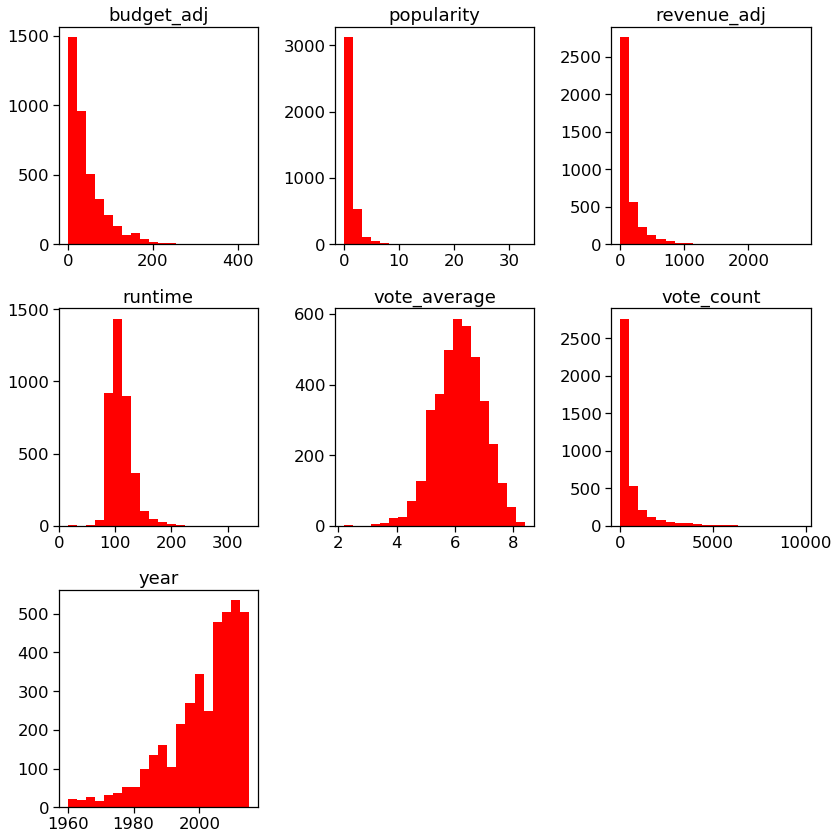

In [207]:
df1.hist(bins = 20,grid=False, figsize = (12,12), color = 'red');
plt.tight_layout()

Based on the the histrograms above, most of the data in not informative in itself, however, one can conclude that the __number of movies made has increased over time.__ 

Next we can use __seaborn__ to quickly investigate the __pairwise relationship between different variables__. 

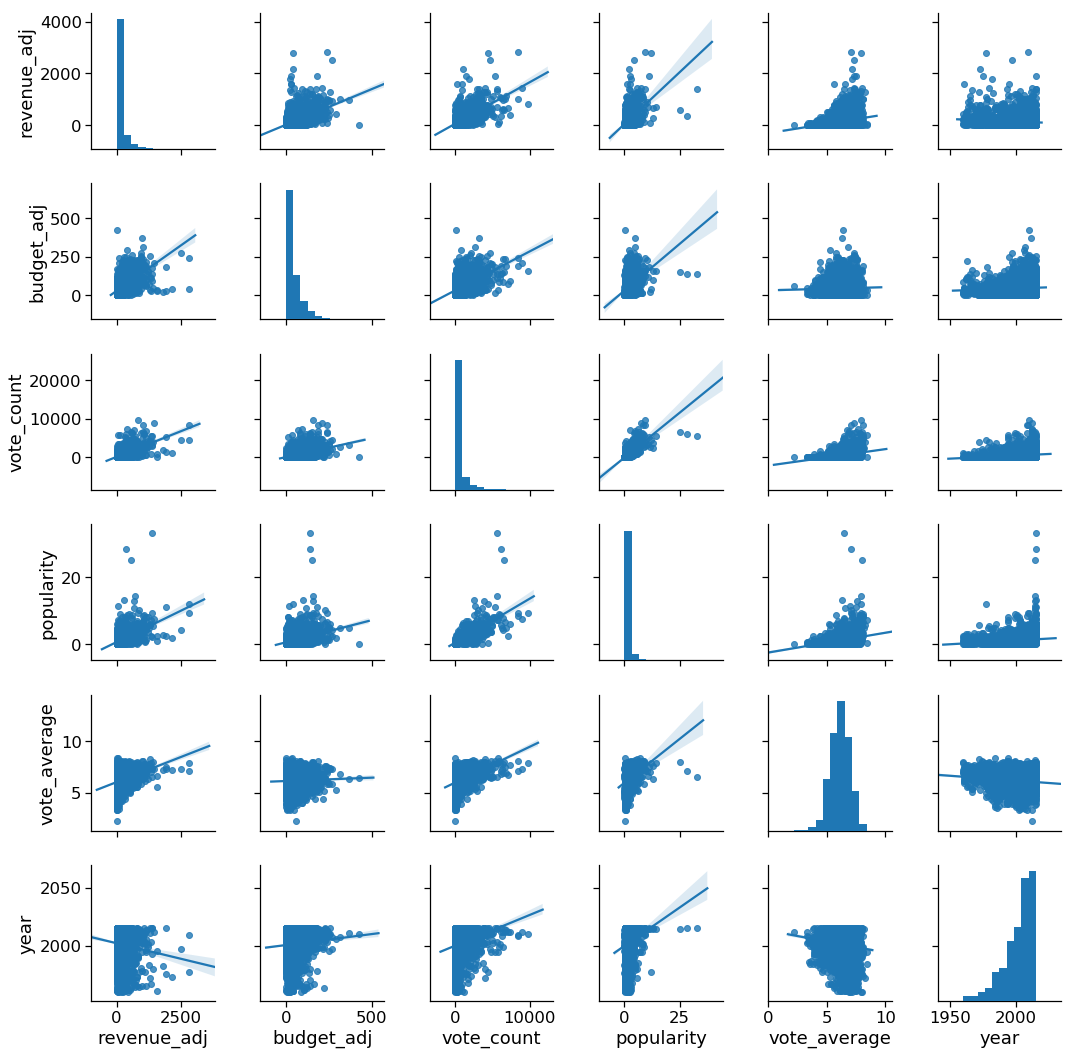

In [210]:
sb.pairplot(df1, vars=["revenue_adj", "budget_adj", 'vote_count', 'popularity','vote_average','year'], kind = "reg");


__Summary of Seaborn Plotting__

- The revenue has a positive correlation with budget, vote_average, vote_count, and popularity. We will investigate this further. 
- The release year also seems to be correlated to the budget, vote count and popularity. We will investigate all three relationships in more details.

## Quantitative investigation of budget, profit, popularity, vote, and time


### Calculate Profit
__The primary metric of the success of a movie is the profit it makes, therefore we will calculate the profit and append it to the database__ 

In [135]:
#Calculate the profit 
df1['profit'] = df1['revenue_adj'] - df1['budget_adj']

#Check if we correctly added the profit column to the database 
df1.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953




#### Investigate outliers based profit

Sometimes there are outliers in the dataset, and it is essential that we ensure that these are corrected or dropped

__For this purpose, we will look at the highest budget, and lowest profit movies__
I will also make new dataframes to investigate this, so as to not alter the original dataframe



In [136]:
#Make another dataframe that has profits sorted from lowest to highests
profit_low = df1.sort_values(by='profit', ascending=True)

profit_low.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit
2244,0.250540,The Warrior's Way,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,425.000000,11.087569,-413.912431
5508,1.214510,The Lone Ranger,Gore Verbinski,149.0,Action|Adventure|Western,2013-07-03,1607,6.0,2013,238.688505,83.578334,-155.110171
7031,0.948560,The Alamo,John Lee Hancock,137.0,Western|History|War,2004-04-07,60,5.9,2004,167.394583,29.807735,-137.586848
2435,1.189386,The 13th Warrior,John McTiernan,102.0,Adventure|Fantasy|Action,1999-08-27,275,6.2,1999,209.448455,80.767119,-128.681336
4970,1.653031,Brother Bear,Aaron Blaise|Robert Walker,85.0,Animation|Adventure|Family|Fantasy,2003-10-20,753,6.8,2003,118.535264,0.000296,-118.534968


In [137]:
#make a dataframe where budget is sorted highest to lowest
budget_high = df1.sort_values(by='budget_adj', ascending=False)

budget_high.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit
2244,0.250540,The Warrior's Way,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,425.000000,11.087569,-413.912431
3375,4.955130,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136.0,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011,368.371256,990.417500,622.046244
7387,4.965391,Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007,315.500575,1010.653508,695.152933
6570,1.957331,Superman Returns,Bryan Singer,154.0,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006,292.050673,423.020464,130.969791
5231,4.355219,Titanic,James Cameron,194.0,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,271.692064,2506.405735,2234.713671


#### Summary of outliers 

Based on looking at the movies that have the highest budgets, and the lowest profit, __The Warrior's Way__ stands out. According to the table, it is the highest budget movie ever made. However, a quick internet search reveals that the budget of the movie was not 425M as shown in the table, but rather 40M, which is huge difference. We will correct this for futher analysis, otherwise such an outlier will affect our results 

#### Fix outliers

In [138]:
#Check to make sure that only one value of the budget for the movie exists
(df1.budget_adj == 425.000).sum()

1

In [139]:
#Change the value of the budget for the warrior's way. 
df1.replace({'budget_adj':{425.000:40.000}}, inplace = True);

In [140]:
#Recalculate profit to fix the error 
df1['profit'] = df1['revenue_adj'] - df1['budget_adj']

### Effect of time on revenue, budget, popularity and vote count 

From __Figure 2__ (the pair plots) we can see that time (release_year) has an effect on revenue, budget, popularity and vote count. 

Since, the year over year data can be noisy, we will first bin the data by decades using the __cut()__ function and then investigate how each of these variables change over time. 

We will create a new column with the decade and add it to the dataframe 



#### Create a new column for decade and add to the dataframe

In [141]:
#Create a list of decades
decade = [1960,1970,1980,1990,2000,2010]
decade

[1960, 1970, 1980, 1990, 2000, 2010]

In [142]:
count_decade = len(decade)
count_decade

6

In [143]:
#Add the new column of decades to the dataframe 
df1['decade'] = pd.cut(x=df1['year'], bins=count_decade, labels=decade)

In [145]:
#Convert decade type to int, will help later on
df1.decade = df1.decade.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3853 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null float64
genres            3853 non-null object
release_date      3853 non-null datetime64[ns]
vote_count        3853 non-null int64
vote_average      3853 non-null float64
year              3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
profit            3853 non-null float64
decade            3853 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 581.4+ KB


#### Number of movies made per decade


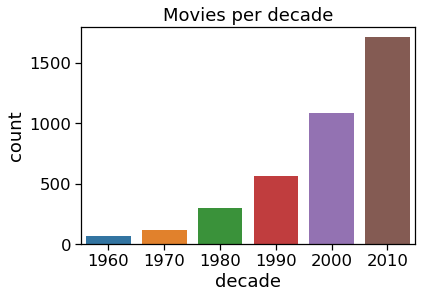

In [146]:
#Here we plot the number of movies made per decade

##Note that for the decade 2010, we only have data for 6 years
##once this decade is over, this number will be higher
sb.countplot(x='decade', data = df1).set_title("Movies per decade");

#### The budget of movies over decades 

First we will look at how the budget of the movies have changed over the decades. For this we will use data binned by decades. The year by year data can be noisy. 

We will analyze the data using both __box plots__ and __bar plots__
- The box plot lets us see the whole spread of data. This is especially useful in spotting outliers which can skew the data. 
- Bar plots give us a good "average" overview, and this lets us see the effect of time on the variables as a whole. 

__The same analysis is done for profit (a better metric of the success of the movie, than revenue), vote_count and popularity__ 

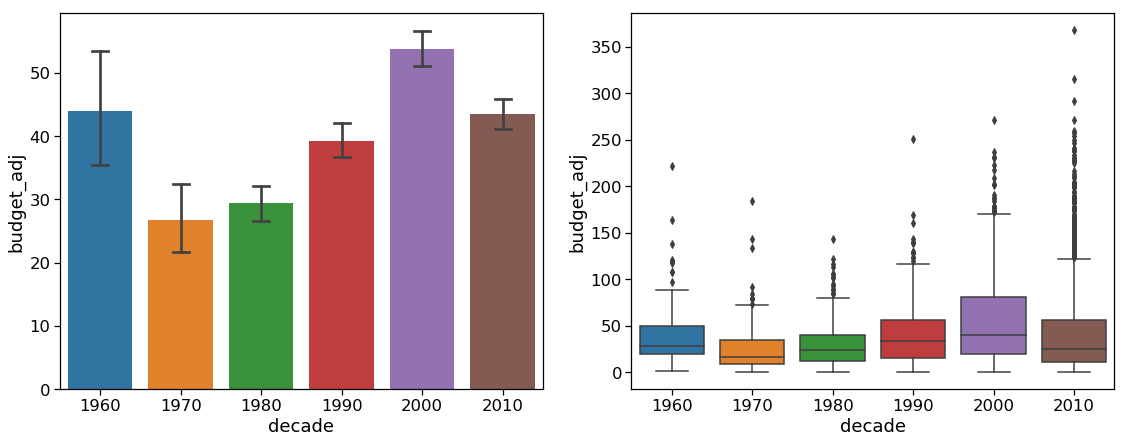

In [147]:
#Since we will do the following plotting for several variables
#We will define a plotting function which will take the given y value, with the x value as decade

def plot_function(y_data):
    fig, axarr = plt.subplots(1, 2, figsize=(16, 6.5))
    sb.set_context("notebook", font_scale=1.5)
    sb.barplot(x="decade", y = y_data, data=df1,capsize=.2, ax=axarr[0]);
    sb.boxplot(x="decade", y = y_data, data=df1, ax=axarr[1]);
    plt.tight_layout()
    
#plot the budget_adj    
plot_function(df1.budget_adj)

#### Profit of movies over different decades

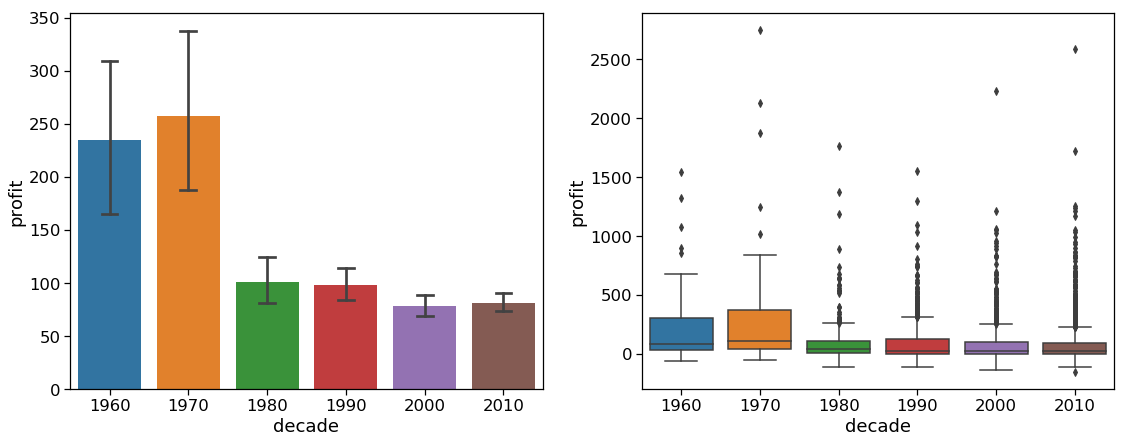

In [148]:
plot_function(df1.profit)

##### Number of highly profitable movies over the decades

In [151]:
#Calculate the increase in the value of investment

movie_profit = np.empty((0,len(decade)))

for i in decade:
    num_movies = len(df1[(df1['profit']>500) & (df1['decade'] == i)])
    movie_profit = np.append(movie_profit, num_movies)

print(movie_profit)

[11. 18. 16. 23. 32. 60.]


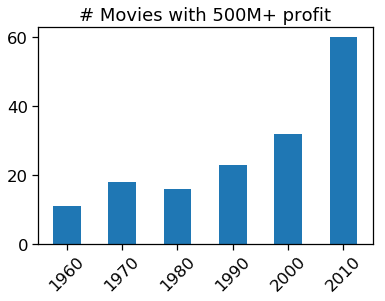

In [152]:
#Plot movie profit
plt.bar(decade,movie_profit, width = 5);
plt.xticks(rotation=45);
plt.xticks(np.arange(min(decade), max(decade)+5, 10));
plt.title('# Movies with 500M+ profit')
plt.show()

#### Vote Count and vote average of movies over decades

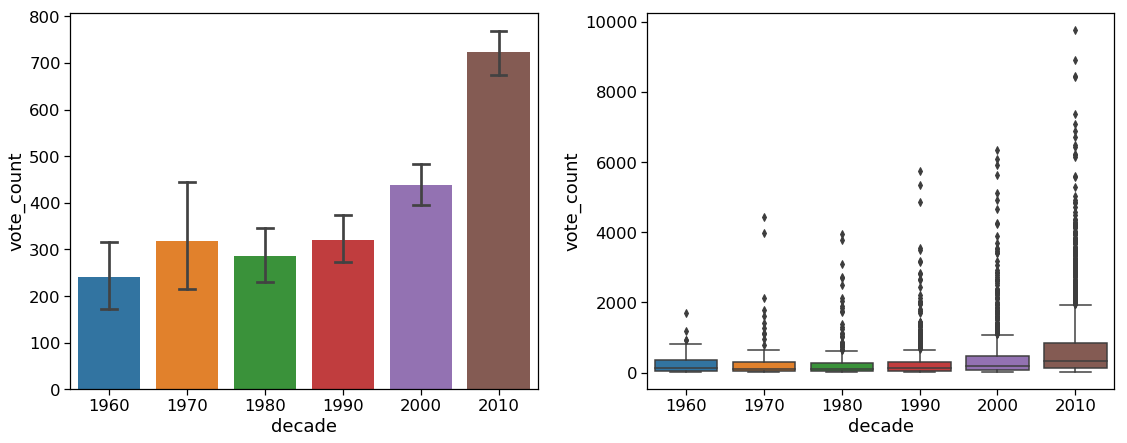

In [153]:
plot_function(df1.vote_count)

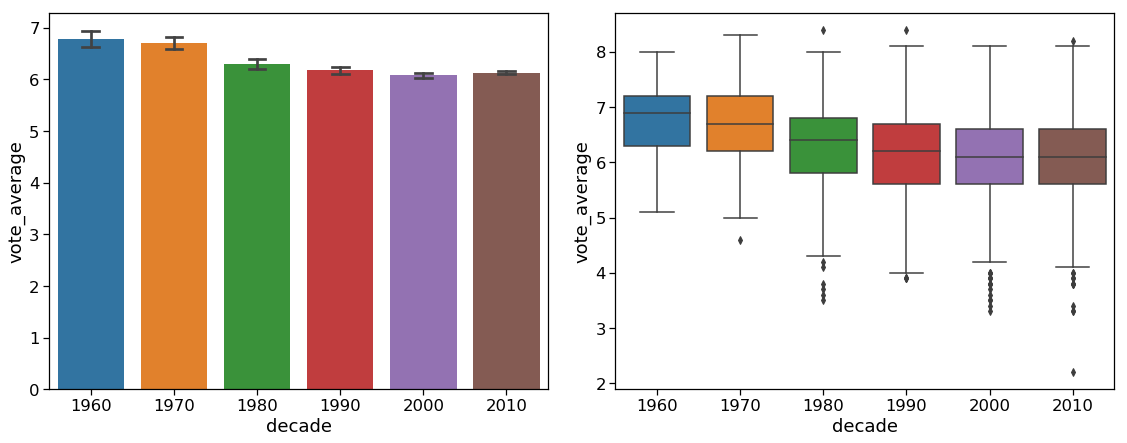

In [154]:
plot_function(df1.vote_average)

#### Popularity of movies over decades

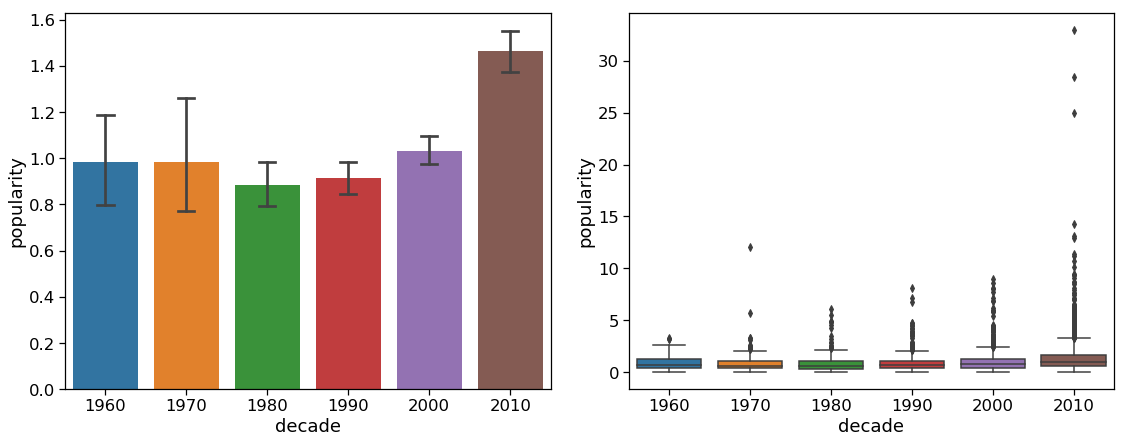

In [155]:
plot_function(df1.popularity)

#### Summary: The budget of movies over decades

Here we look at how different variables change over time (Decades)

1. __Adjusted budget vs time__:  We see that after 1960s, there was a fall in the average budget for the next two decades, but the recent decades have seen a higher average spending. Looking at the box plot that has all the data, this is primarily due to the rise in high budget movies in recent years. _Conclusion: Increase in the number of high budget movies in the recent years is leading to an increased average budget_

2. __Profit vs time__: Here we see that the average profit was higher in the 60's and 70's. However, if we look at the box plot, we see that we have a lot of outliers for the recent decades, suggesting that there are more movies that are making really big profits. 
    1. To confirm this, I looked at the number of movies making >500M. When we plot this data, we can clearly see that over time, the number of highly profitable movie increases. 
    2. _Conclusion: Though the average profit may have gone down over the decades, we are getting more and more movies that are highly profitable._
    
3. __Vote count and vote average vs time__: Here from both the box and bar plots we see that the count of votes increase over time. However, the average vote (or rating) of the movie doesn't change. _Conclusion: There is an increase number of votes, possibly due to the increase in internet usage and social media, but the average perceived quality of the movies have not changed_. 

4. __Popularity vs time__: We see that there is a significant increase in the 2010's, and this is mostly due to some really popular movies in this time (Boxplot), which skew the mean. _Conclusion: There have been more really popular movies in 2010's compared to the rest of the decades_. 


### Relationship between profit and vote_count, popularity, budget, vote_average

_Here the relationship between the profit and the four mentioned variables is investigated_ 

The main aims is to fine 
1. Is there a positive correlation between the profit and the other variables
2. Pairwise correlation coefficients 


#### Visualization of data
1. First I draw a scatter plot for profit and each variable. Each of the plots have the following attributes
    1. The decades are color coded
    2. The revenue is denoted by the size of the dots 
2. Seaborn reg plot is used to show the correlation between profit and the other variables
    1. A linear regression model is used for all the plots
    2. The shaded region next to the curve represents 95% C.I. 
    
Plotting the data in this manner allows us to not only see if there is a positive correlation, but also lets us see time and budget information of the movie

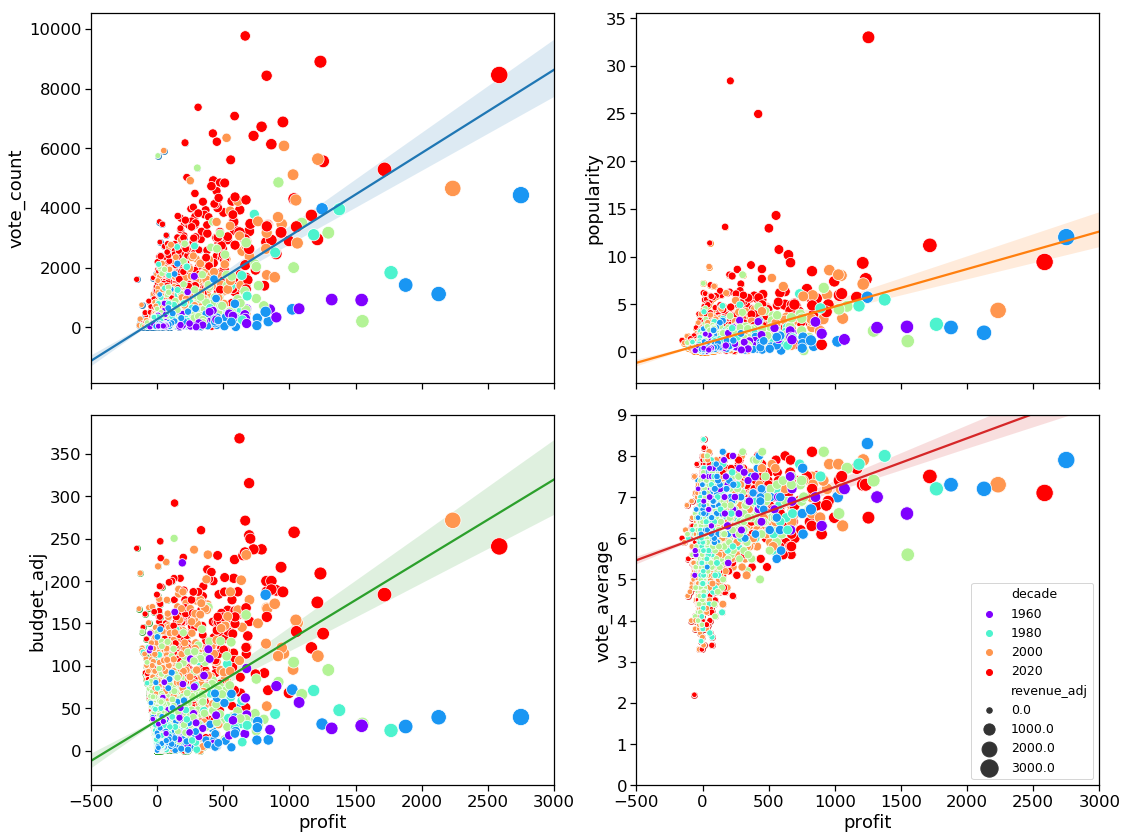

In [156]:
#### Profit vs vote_count, vote_average, budget_adj, popularity

#define subplot
fig, axarr = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey = False);
plt.xlim(-500, 3000);

#Make an array for the y axis data
y_axis = [[df1.vote_count, df1.popularity],[df1.budget_adj, df1.vote_average]]

#plot the data
for i in range(2):
    for j in range(2):
        sb.regplot(x="profit", y= (y_axis[i][j]), data=df1, ax=axarr[i, j]);
        sb.scatterplot(x='profit',y= (y_axis[i][j]),size = 'revenue_adj',sizes=(30, 300),hue = 'decade', palette = "rainbow",legend=False, data = df1, ax=axarr[i,j]);

#final plot is replotted to contain the legend 
sb.scatterplot(x='profit',y='vote_average',size = 'revenue_adj',sizes=(30, 300), hue = 'decade',palette = "rainbow", data = df1, ax=axarr[1, 1]);
plt.ylim(0, 9);
plt.legend(fontsize='x-small');

plt.tight_layout()

__We can do a quick regression analysis to see that indeed there is a positive correlation between profit and budget (p ~ 0)__

We do a correlation coefficient matrix in the next step to look at pairwise correlation 

In [157]:
x = df1['profit']
y = df1['vote_count']
stat_results = scipy.stats.linregress(x,y)
print(stat_results)

LinregressResult(slope=2.7875532002964483, intercept=268.7599198339064, rvalue=0.6142842797008286, pvalue=0.0, stderr=0.05770197555569257)


#### Correlation between different variables

Next we will look at the correlation between the different variables. A correlation of 1 means perfect posivite correlation, 0 is no correlation, and -1 is negative correlation. 

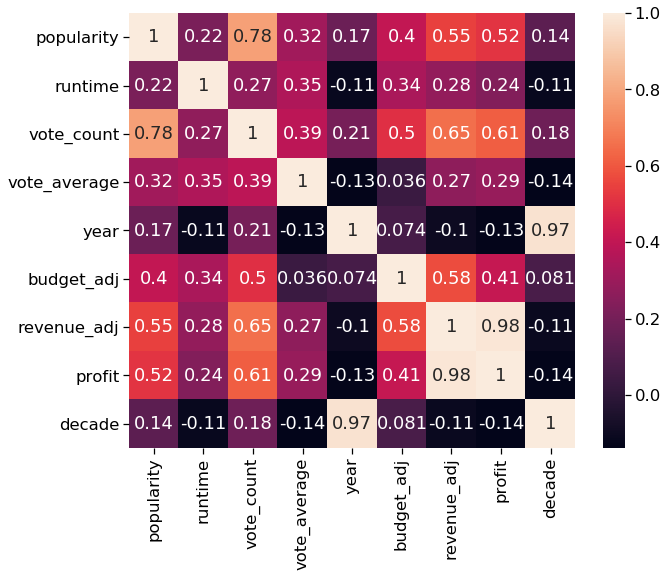

In [158]:
plt.figure(figsize=(10,8))
sb.heatmap(df1.corr(), annot = True);


#### Summary: Variables affecting profit 

__Based on the above analysis we can conclude__
1. Popularity, budget, vote_count and vote_average are positively correlated to profit
2. The year does not correlate with profit 

 ### Effect of the release month the success of movie
 
 Here we will analyze if the release month affects the profit or popularity of the movie 
 

In [159]:
#Make a new column in the dataframe with the release month (month)
df1['month'] = df1['release_date'].dt.month
df1.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit,decade,month
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010,6


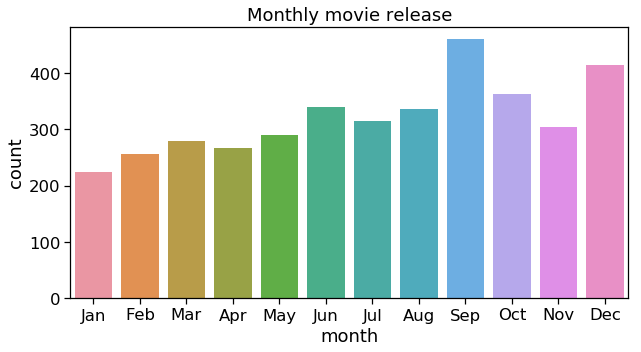

In [160]:
month_label = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct','Nov','Dec')
plt.figure(figsize=(10,5))
sb.countplot(x='month', data = df1).set_title("Monthly movie release");
plt.xticks( np.arange(12), month_label );

__There is mostly an even spread of the number of movies released monthly, with the exception of September and December__

#### Release month vs profit

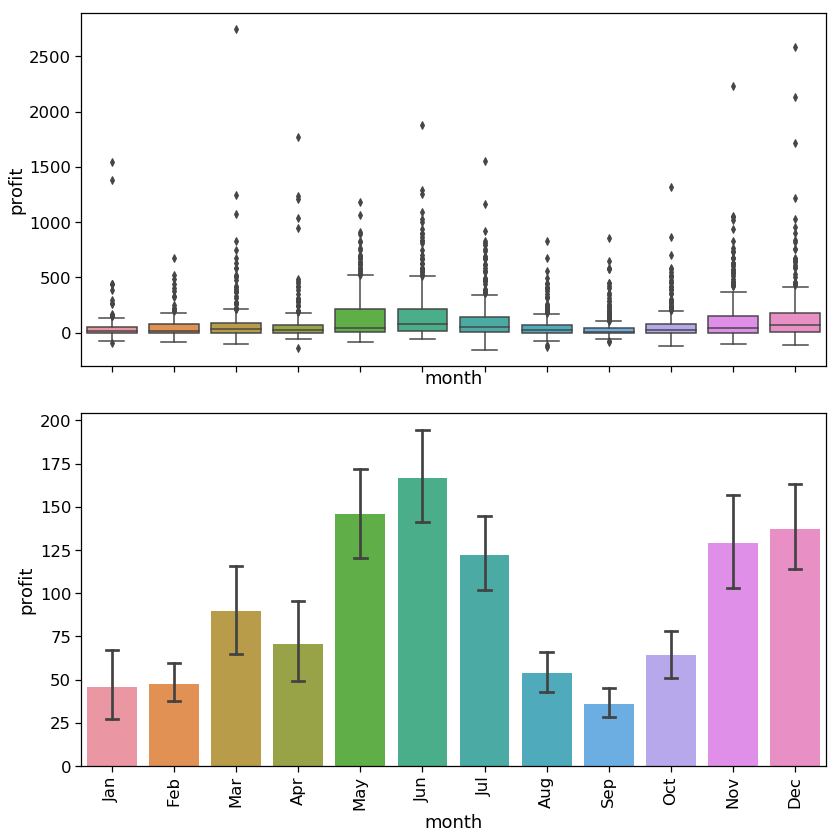

In [161]:
def plot_function_2(y_axis_2):
    fig, axarr = plt.subplots(2, 1, figsize=(12, 12), sharex=True);
    sb.set_context("notebook", font_scale=1.5)

    sb.boxplot(x="month", y=y_axis_2, data=df1, ax=axarr[0]);
    sb.barplot(x="month", y=y_axis_2, data=df1,capsize=.2, ax=axarr[1]);
    plt.xticks( np.arange(12), month_label, rotation = 90 );
    
    plt.tight_layout()

plot_function_2(df1.profit)


In this case the bar plot is really informative and shows that the movies in June and December make the most profit. These months also conincide with the beginning of the summer and winter break. 

#### Release month vs popularity

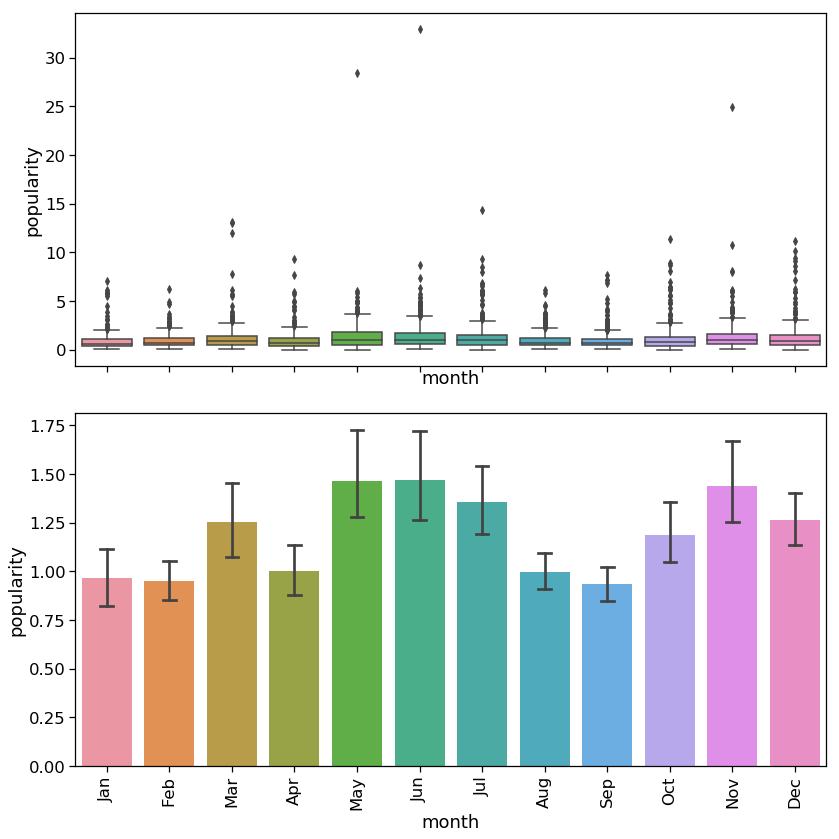

In [162]:
plot_function_2(df1.popularity)

Popularity shows the same trend as profit, though not as pronounced. 

#### Summary: Effect of release month

Based on this analysis, the best time to release a month is at the beginning of the summer or winter holiday breaks. 

## Find the non-quantitative attributes of the most successful movies 

Till now, we have been analyzing the whole dataset to find correlations between different variables that can be predictors of the success of a movie (measure either by profit, or by popularity)

__Now, we will only look at movies that were box office success, i.e. profit > 500M__

We will investigate the following 
1. The directors with the most movies with profit >500M 
2. Most popular genres >500M profit movies 

In [163]:
#Make a new dataframe with movies only with profit >500M
df_success = df1.query('profit > 500')
df_success.head(5)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit,decade,month
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010,6
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183.999919,1902.723130,1718.723211,2010,12
4,9.335014,Furious 7,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174.799923,1385.748801,1210.948878,2010,4
8,7.404165,Minions,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015,68.079970,1064.192017,996.112047,2010,6
9,6.326804,Inside Out,Pete Docter,94.0,Comedy|Animation|Family,2015-06-09,3935,8.0,2015,160.999929,785.411575,624.411646,2010,6


In [164]:
df_success.shape

(160, 14)

### Directors with most movies with >500M profit 

In [165]:
df_success.director.value_counts().head(10)

Steven Spielberg    10
Peter Jackson        6
George Lucas         5
Chris Columbus       5
Michael Bay          4
David Yates          4
Guy Hamilton         3
Robert Zemeckis      3
James Cameron        3
Gore Verbinski       3
Name: director, dtype: int64

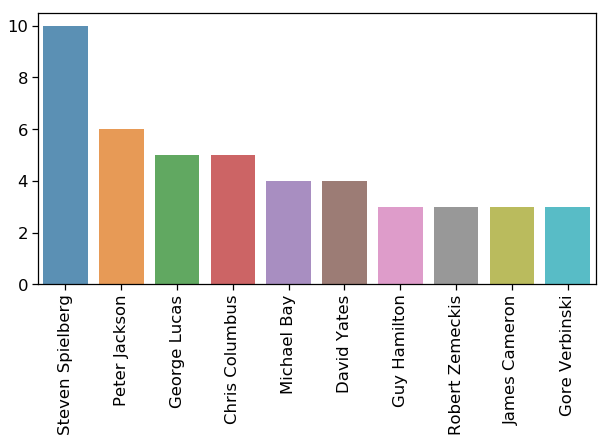

In [166]:
#Plot the directors with highest number of >500M profit movies 
movie_count  = df_success['director'].value_counts()
movie_count = movie_count[:10,]
plt.figure(figsize=(10,5))
plt.xticks(rotation=90);
sb.barplot(movie_count.index, movie_count.values, alpha=0.8);

### Genres with most profitable movies 

We will first split the genre column, and then combine with split columns with the main dataframe 

In [167]:
#split the genres column
genres_new = df_success['genres'].str.split("|",expand = True)
#rename the genres
genres_new.columns = ['genre_1', 'genre_2', 'genre_3','genre_4','genre_5']

In [144]:
df_success.head(1)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit,decade,month
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010,6


In [168]:
#Add the genres and create a new dataframe 
df_genres_new = pd.concat([df_success,genres_new], axis = 1, join = "outer")

In [146]:
df_genres_new.head(2)

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,year,budget_adj,revenue_adj,profit,decade,month,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953,2010,6,Action,Adventure,Science Fiction,Thriller,None
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183.999919,1902.723130,1718.723211,2010,12,Action,Adventure,Science Fiction,Fantasy,None


Next we will __reshape the data frame to combine the genres into one column, but with each row having a single genre.__
I.E. There will be multiple rows for a single movie, each with a single genre. Doing this will make the following column operations easier. 

In [169]:
#Reshape the data frame 
df_final = pd.wide_to_long(df_genres_new, ['genre_'], 'original_title', 'age').reset_index().drop('age',1)

In [170]:
df_final.rename(index=str, columns={"genre_": "genre"}, inplace = True);

In [171]:
df_final.head(1)

,original_title,vote_average,vote_count,release_date,month,decade,runtime,profit,genres,budget_adj,year,popularity,revenue_adj,director,genre
0,Jurassic World,6.5,5562,2015-06-09,6,2010,124.0,1254.445953,Action|Adventure|Science Fiction|Thriller,137.999939,2015,32.985763,1392.445893,Colin Trevorrow,Action


In [172]:
#Confirm that each of the movie is repeated five times 
df_final.original_title.value_counts().head(10)

War of the Worlds                     5
Monsters, Inc.                        5
Robin Hood: Prince of Thieves         5
The Graduate                          5
Indiana Jones and the Last Crusade    5
You Only Live Twice                   5
Shrek 2                               5
Blazing Saddles                       5
Shrek the Third                       5
Iron Man 3                            5
Name: original_title, dtype: int64

__Next we will count which genres have the highest number of >500M profit movies and plot them__

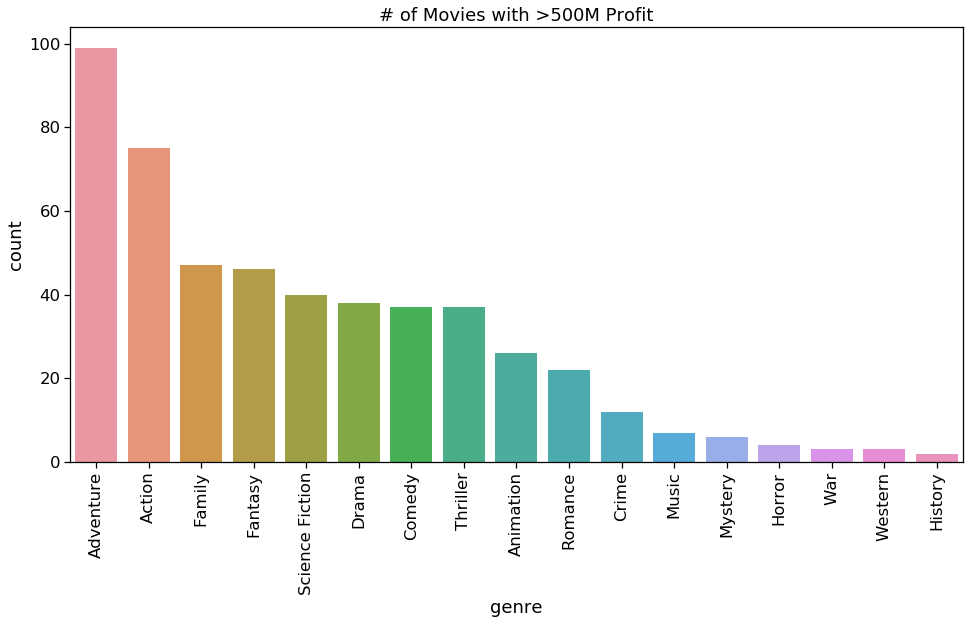

In [173]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90);
sb.countplot(x='genre', data = df_final, order = df_final['genre'].value_counts().index).set_title("# of Movies with >500M Profit");

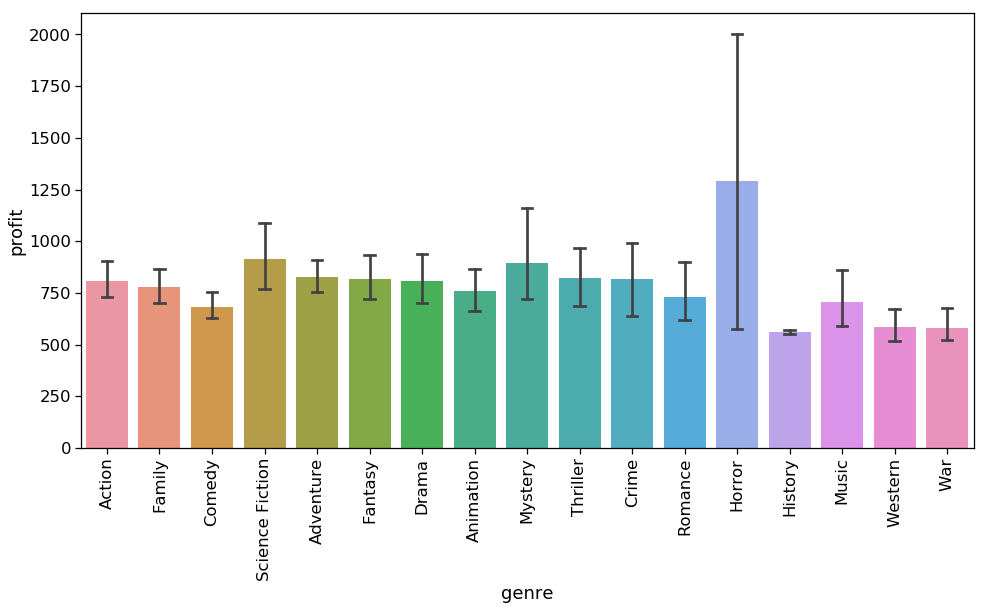

In [174]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90);
sb.barplot(x="genre", y="profit",capsize=.2, data=df_final);

### Summary: Non - quantitative attributes
1. Steven Speilberg is the most successful director 
2. Action and Adventure movies make the most money 

### Bonus: Word Cloud

Word clouds are a fun way to visualize data, and here I include one for the genre of movies with >500M in profit

In [175]:
text = df_final['genre']

In [176]:
#this line of code removes the none from the text list 
text_filtered = list(filter(None, text))

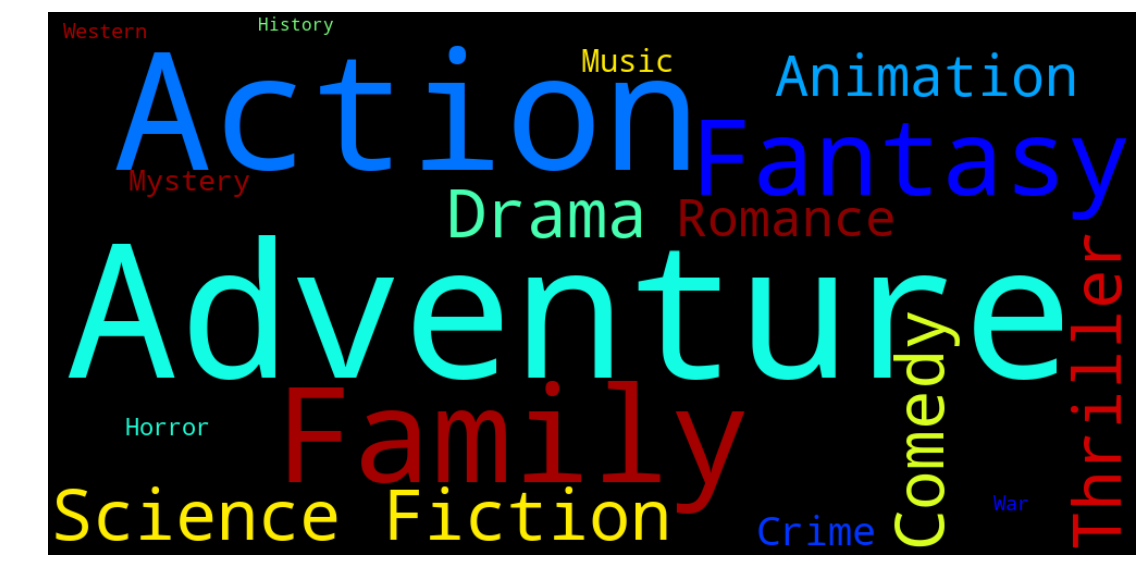

In [184]:
#print out word cloud 
unique_string=(" ").join(text_filtered)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',colormap = 'jet', stopwords = STOPWORDS).generate(str(unique_string));

fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

## Conclusions 

__In this analysis I determined what attributes make a movie successful. Each section contains a summary of the analysis, and here I summarize the complete project.__ 

### Data Cleanup 
1. The data was cleaned up to drop any missing values, non-necessary columns and any budget or revenue values that contained zero. This dropped down the number of movies from >10,000 down to 3853. 
    1. Though this resulted in loss of >50% of the original data, there dataset is significantly large enough to analyze. 
    2. Further cleaning was done on one outlier, the movie "The Warrior's Way". The budget of the movie was reported incorrectly, and this was corrected (Budget for a warrior's way https://en.wikipedia.org/wiki/The_Warrior%27s_Way)
    3. The profit for the movies was calculated using the budget_adj and revenue_adj. The profit is the correct metric (compared to the revenue to judge the box office success of a movie). __Also, it is essential to realize that the _adjusted budget and revenue_ should be used for analysis, because these take inflation into account.__
    
### Analysis and limitation 
1. __Pandas hist() function, and seaborn pairplots()__ were utilized to see any obvious correlations, and were used as the basis of further investigation. 
    1. The revenue has a positive correlation with budget, vote_average, vote_count, and popularity. 
    2. The release year also seems to be correlated to the budget, vote count and popularity. 
    3. __Limitation__ - Though these plots are good for cursory analysis, they do not provide many quantitative insights and other methods need to be used. 

2. __The number of movies made per decade have increased with time.__

3. __Budget, profit, vote count and popularity of the movies were investigated as a function of time using seaborn barplots and boxplots__
    1. __Adjusted budget vs time__:  We see that after 1960s, there was a fall in the average budget for the next two decades, but the recent decades have seen a higher average spending. Looking at the box plot that has all the data, this is primarily due to the rise in high budget movies in recent years. _Conclusion: Increase in the number of high budget movies in the recent years is leading to an increased average budget_

    2. __Profit vs time__: Here we see that the average profit was higher in the 60's and 70's. However, if we look at the box plot, we see that we have a lot of outliers for the recent decades, suggesting that there are more movies that are making really big profits. 
        1. To confirm this, I looked at the number of movies making >500M. When we plot this data, we can clearly see that over time, the number of highly profitable movie increases. 
        2. _Conclusion: Though the average profit may have gone down over the decades, we are getting more and more movies that are highly profitable._
    
    3. __Vote count and vote average vs time__: Here from both the box and bar plots we see that the count of votes increase over time. However, the average vote (or rating) of the movie doesn't change. _Conclusion: There is an increase number of votes, possibly due to the increase in internet usage and social media, but the average perceived quality of the movies have not changed_. 

    4. __Popularity vs time__: We see that there is a significant increase in the 2010's, and this is mostly due to some really popular movies in this time (Boxplot), which skew the mean. _Conclusion: There have been more really popular movies in 2010's compared to the rest of the decades_. 
    5. __Limitations of analysis__: 
        1. Even though the boxplot gives use the whole data, it is sometimes hard to interpret data with a large number of outliers, because the axis are squeezed. 
        2. The barplot gives only the average, and singular events maybe lost. 
        3. IMPORTANT: A combination of box and bar plots should be used to better analyze both, the means of the data, and the spread of the data. 

4. __Relationship between profit and vote_count, popularity, budget, vote_average__
    1. Popularity, budget, vote_count and vote_average are positively correlated to profit
    2. The year does not correlate with profit 
    3. __Limitations__:  Although the correlation is positive, but the R squared value is on the order of 0.5, which is not a very strong correlation. This will be the case with such large datasets, and sometimes it's hard to find very quantitative relationships. Therefor for this analysis, we cannot say that "_if a movie's budget was x, then the profit would be y_", we can only draw qualitative correlations. 
    
5. __Effect of month on the success of movie__
    1. An analysis of profit and popularity shows that June and Decemeber are the best months to release a movie 
    2. This is probably because these coincide with vacations and holidays 
    
6. __Non-quantitative attributes of a successful movie__
    1. For this analysis, only box-office hit movies (profit >500M) were considered. 
        1. Steven Spielberg is the most successful director, with 10 movies with 500M+ profit 
        2. Adventure and Action are the most popular genre for successful movies. 
             1. __Limitation__: This is not the most popular genre of movies. However, the aim of this project is to find out what are the attributes of successful movies, not just movies. 

7. Challenges: The biggest challenge was the data cleanup, and dealing with columns, such as genre, that had multiple values, and getting them to a more analytical friendly form. 

8. __Additional data__: As we progress into the digital age, it was be interesting to analyze
    1. The age group of the viewers
    2. Release channels: Theaters, Netflix, Amazon
    3. Most frequent media channel (Theaters, Netflix, Amazon) used to watch the movie, and associated revenue. 
    4. Number of viewers in the movie theaters, and the total number of viewers. 



## List of references used

Figure size
https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

Pandas Documentation
https://pandas.pydata.org/pandas-docs/stable/index.html

Word Cloud
https://www.datacamp.com/community/tutorials/wordcloud-python

Budget for a warrior's way 
https://en.wikipedia.org/wiki/The_Warrior%27s_Way

What is popularity
https://developers.themoviedb.org/3/getting-started/popularity

Seaborn plotting
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
https://seaborn.pydata.org/generated/seaborn.regplot.html

Combining multiple columns into one
https://stackoverflow.com/questions/34376053/pandas-dataframe-stack-multiple-column-values-into-single-column
https://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.wide_to_long.html